<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_28_Intervalo_de_confianza_de_la_proporci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Calcular intervalos e confianza de la proporción

# Descripción

A partir de datos muestrales, para este caso se pretente inferri acerca del intervlo de confianza de la proporción sobre una pobación.

El proceso del caso incluye:

* Descripción del fundamento teórico
* Cargar librerías
* Cargar funciones
* Descripcón de ejercicio que incluye e contexto
* Inicializar datos
* Cálculo del intervalo de confanza
* Interpretación de resultados de cada ejercicio
* Interpretació del caso



# Fundamento teórico

El intervalo de confianza de la proporción es un rango estimado dentro del cual se espera que esté la proporción verdadera de una población, con cierto nivel de confianza.

Por ejemplo, si se quiere estimar la proporción de personas que prefieren un producto sobre otro en una población, se puede obtener una muestra y calcular la proporción muestral.

El intervalo de confianza de la proporción proporciona un rango en el que es probable que se encuentre la verdadera proporción en la población general.

Para determinar intervalo de confianza de una proporción sería similar al intervalo de confianza de una media poblacional solo que haciendo uso de la desviación de la proporción.

## Fórmula para estimar el intervalo de confianza de la proporción

Todo a partir de la fórmula del intervalo de confianza de la media pobacional del caso 26.

$$
IC_{media} = \bar{x} \pm z \cdot (\frac{\sigma}{n})
$$

Ahora fórmula para estimar el intervalo de confianza de la proporción.

$$
IC_{proporción} = p \pm Z \cdot (\frac{p\times q}{n})
$$

Dónde:

* IC es el intervalo de confianza.
* IC_{proporción} es intervalo de proporción calculado a partur de la fórmula con los estadísticos adecuados.
* $p$ es la proporción muestral.
* $q$ es el complemento de la proporción, de tal forma que $p + q = 1$ es igual a la unidad
* $𝑛$ es el tamaño de la muestra.
* $Z$ es el valor crítico de la distribución normal estándar para el nivel de confianza deseado.

| % Confianza|Valor crítico de Z|
|------------|------------------|
| 80%        | 1.2816           |
| 90%        | 1.645            |
| 95%        | 1.960            |
| 99%        | 2.576            |






## Cargar librerías

In [8]:
import numpy as np
from scipy.stats import norm

import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Cargar funciones

In [17]:
def f_visualizar_dens_area_normal_z(confianza, ax):
    z = np.linspace(-3.5, 3.5, 1000)  # Valores de z para la gráfica
    densidad = stats.norm.pdf(z)  # Densidad de probabilidad

    # Valores críticos de z para el nivel de confianza dado
    alfa = 1 - confianza
    z_critico = stats.norm.ppf(1 - alfa/2)

    # Área de la cola izquierda
    area_izquierda = stats.norm.cdf(-z_critico)
    # Área de la cola derecha
    area_derecha = 1 - stats.norm.cdf(z_critico)

    # Visualización
    ax.plot(z, densidad, 'b-', label='Densidad de probabilidad')
    ax.fill_between(z, densidad, where=(z <= -z_critico), color='red', alpha=0.5, label=f'Área {alfa/2:.4f} izquierda')
    ax.fill_between(z, densidad, where=(z >= z_critico), color='red', alpha=0.5, label=f'Área {alfa/2:.4f} derecha')
    ax.axvline(-z_critico, color='black', linestyle='--', label=f'Z crítico: +-{z_critico:.4f}')
    ax.axvline(z_critico, color='black', linestyle='--')
    ax.set_xlabel('Z')
    ax.set_ylabel('Densidad de probabilidad')
    ax.set_title(f'Distribución normal estándar al {confianza}% de confianza')
    ax.legend()
    ax.grid(False)

In [5]:
confianza = [0.80, 0.90, 0.95, 0.99]
# Calcular el valor crítico de la distribución normal estándar
z_critico = np.abs(norm.ppf((1 - np.array(confianza)) / 2)) # dos colas
# print (z_critico)
z_critico_izq = -(z_critico)
z_critico_der = z_critico
confianzas_z = pd.DataFrame({'confianza':confianza, 'z critico':np.round(z_critico, 6),
                            'z crítico izq':np.round(z_critico_izq, 6), 'z crítico der':np.round(z_critico_der, 6)})
print ("Valor de nivels de confianza y valores de z a dos colas")
print (confianzas_z)

Valor de nivels de confianza y valores de z a dos colas
   confianza  z critico  z crítico izq  z crítico der
0       0.80   1.281552      -1.281552       1.281552
1       0.90   1.644854      -1.644854       1.644854
2       0.95   1.959964      -1.959964       1.959964
3       0.99   2.575829      -2.575829       2.575829


## Vissualmente valores de z


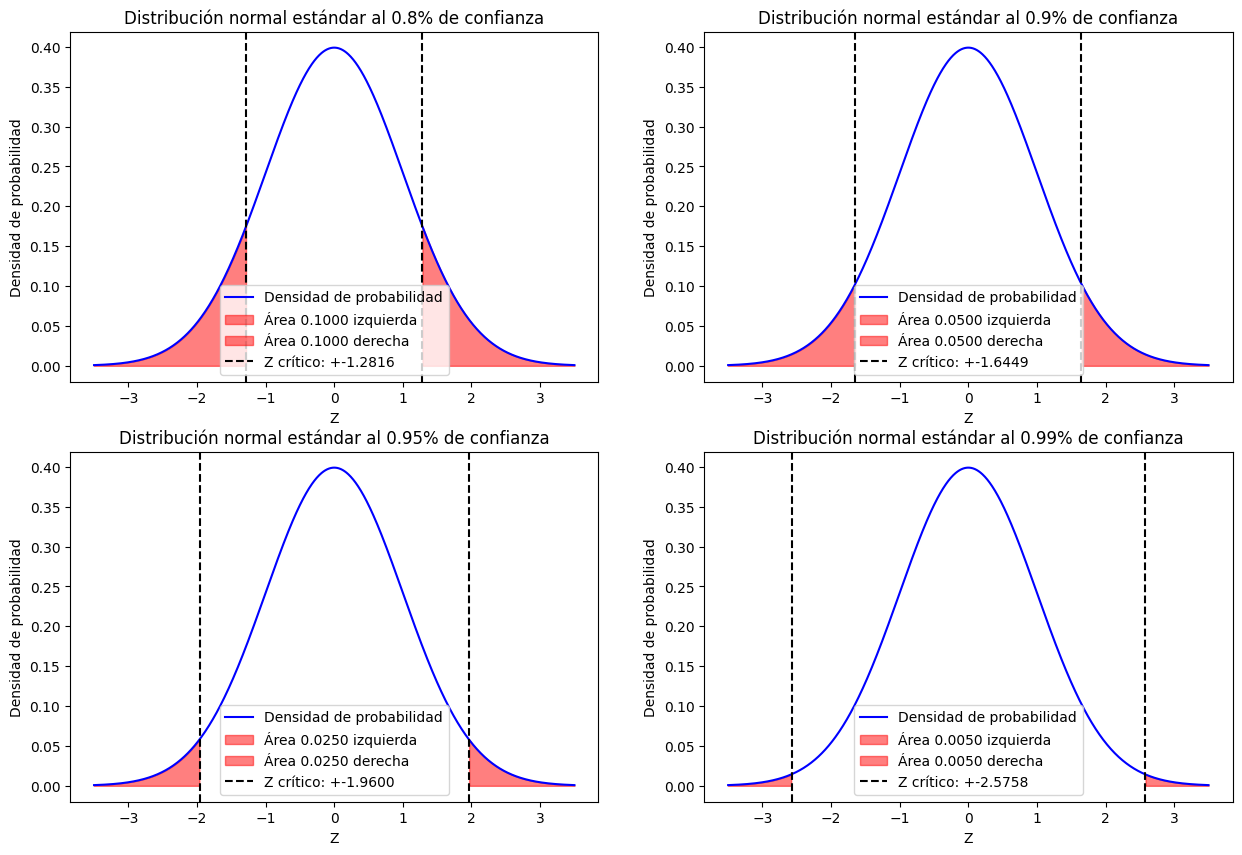

In [18]:
# Crear una matriz de subplots 2x2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Visualizar la distribución normal estándar para diferentes niveles de confianza en cada subplot
f_visualizar_dens_area_normal_z(0.80, axs[0, 0])
f_visualizar_dens_area_normal_z(0.90, axs[0, 1])
f_visualizar_dens_area_normal_z(0.95, axs[1, 0])
f_visualizar_dens_area_normal_z(0.99, axs[1, 1])

# Desarrollo

Pendiente



# Interpretación

Pendiente ...